#                 SALES DATA ANALYSIS 

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('superstore_sales.xlsx')

In [3]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


# Finding null values

In [4]:
df.isna().sum() # not a single null values 

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

# Finding all duplicates 

In [8]:
df[df.duplicated()]  # no duplicate values 

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year


# OBJECTIVE
Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer.

What is the overall sales trend?

Which are the Top 10 products by sales?

Which are the Most Selling Products?

Which is the most preferred Ship Mode?

Which are the Most Profitable Category and Sub-Category?

# What is the overall sales trend?

In [9]:
df.info() # all the date and time are of correct data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [10]:
df['order_date'].min() # the minimum date of order 

Timestamp('2011-01-01 00:00:00')

In [11]:
df['order_date'].max() #the maximum date of order 

Timestamp('2014-12-31 00:00:00')

In [12]:
# Getting the month_year from the data set 
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [13]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014,2014-12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014,2014-12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014,2014-12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014,2014-12


In [20]:
data=df.groupby('month_year').sum()['sales'].reset_index() # we want to calculate month on month sales 
data


C:\Users\DC\AppData\Local\Temp\ipykernel_8504\3571809526.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=df.groupby('month_year').sum()['sales'].reset_index() # we want to calculate month on month sales


,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


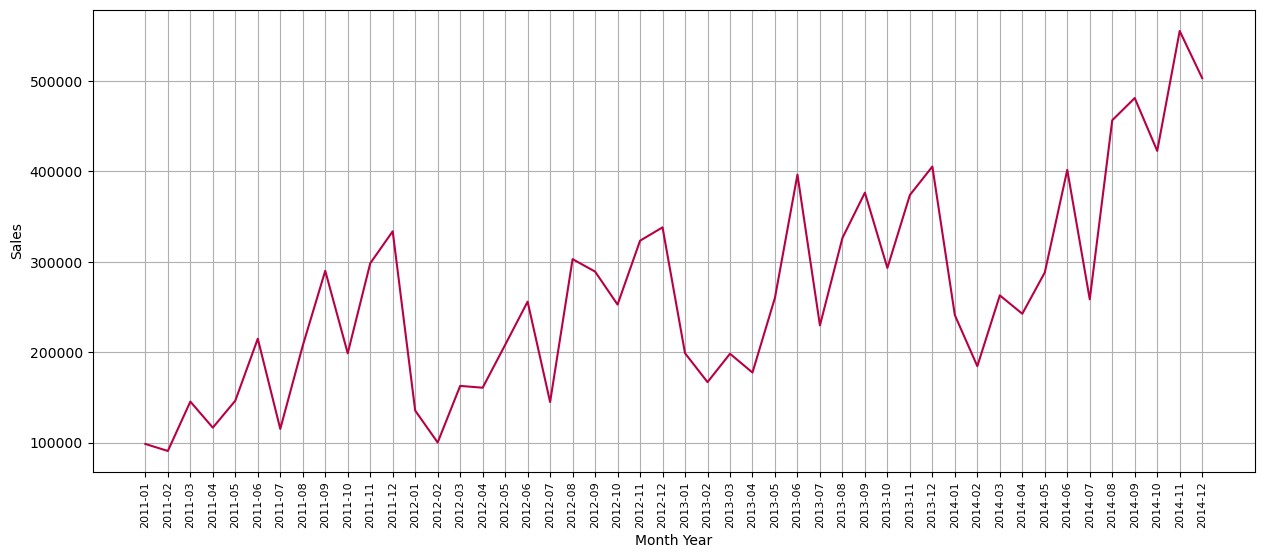

In [26]:
# PLOTTING THE GRAPH
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6)) # incresing the size of image vertically 
plt.plot(data['month_year'],data['sales'],color='#b80045')
plt.xticks(rotation='vertical',size=8) #rorate x axis legends
plt.xlabel("Month Year")
plt.ylabel("Sales")
plt.grid() # lines in graph 
plt.show()

# Which are the Top 10 products by sales?

In [27]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014,2014-12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014,2014-12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014,2014-12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014,2014-12


In [36]:
sales=pd.DataFrame(df.groupby('product_name').sum()['sales'])

C:\Users\DC\AppData\Local\Temp\ipykernel_8504\3505657667.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales=pd.DataFrame(df.groupby('product_name').sum()['sales'])


In [37]:
sales

,sales
product_name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660
iOttie HLCRIO102 Car Mount,215.892
iOttie XL Car Mount,223.888


In [39]:
sales.sort_values('sales',ascending=False)

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
...,...
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.7000
Grip Seal Envelopes,7.0720
Xerox 20,6.4800


# Which are the Most Selling Products?

In [49]:
prod=pd.DataFrame(df.groupby('product_name').sum()['quantity'])

C:\Users\DC\AppData\Local\Temp\ipykernel_8504\2844151444.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prod=pd.DataFrame(df.groupby('product_name').sum()['quantity'])


In [50]:
prod

,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8
"#10 Gummed Flap White Envelopes, 100/Box",11
#10 Self-Seal White Envelopes,10
"#10 White Business Envelopes,4 1/8 x 9 1/2",32
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",24
iOttie HLCRIO102 Car Mount,12
iOttie XL Car Mount,14


In [51]:
prod.sort_values('quantity',ascending=False)

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
...,...
Penpower WorldCard Pro Card Scanner,1
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1
Boston 1900 Electric Pencil Sharpener,1


# Which is the most preferred Ship Mode?

In [59]:
pd=df.groupby('ship_mode').count()

,order_id,order_date,ship_date,customer_name,segment,state,country,market,region,product_id,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
ship_mode,,,,,,,,,,,,,,,,,,,,,
First Class,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,...,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505
Same Day,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,...,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701
Second Class,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309,...,10309,10309,10309,10309,10309,10309,10309,10309,10309,10309
Standard Class,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775,...,30775,30775,30775,30775,30775,30775,30775,30775,30775,30775


<Axes: xlabel='ship_mode', ylabel='count'>

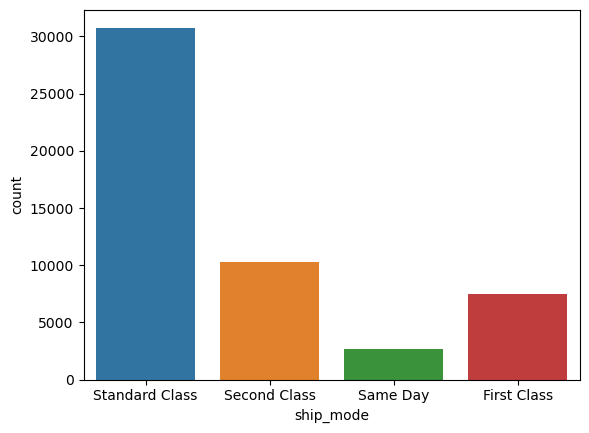

In [65]:
import seaborn as sns 
sns.countplot(x='ship_mode', data=df)

# Which are the Most Profitable Category and Sub-Category?

In [73]:
bb=pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])

C:\Users\DC\AppData\Local\Temp\ipykernel_8504\2354480587.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bb=pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])


In [74]:
bb

profit
category        sub_category              
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870
Office Supplies Appliances    141680.58940
                Art            57953.91090
                Binders        72449.84600
                Envelopes      29601.11630
                Fasteners      11525.42410
                Labels         15010.51200
                Paper          59207.68270
                Storage       108461.48980
                Supplies       22583.26310
Technology      Accessories   129626.30620
                Copiers       258567.54818
                Machines       58867.87300
                Phones        216717.00580

In [75]:
bb.sort_values('profit',ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
Office Supplies Appliances    141680.58940
Technology      Accessories   129626.30620
Office Supplies Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
Technology      Machines       58867.87300
Office Supplies Art            57953.91090
Furniture       Furnishings    46967.42550
Office Supplies Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Tables        -64083.38870